# Data Analysis Intern at Cognifyz Technologies

# Level 1

## Task 1 : Task: Top Cuisines


### Determine the top three most common cuisines in the dataset.

In [5]:
import pandas as pd
df = pd.read_csv("Dataset .csv")
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [6]:
df["Cuisines"].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      shape=(1826,), dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
import pandas as pd
from collections import Counter


df = df.dropna(subset=['Cuisines'])
df['Cuisines'] = df['Cuisines'].astype(str)  

df['Cuisines'] = df['Cuisines'].str.split(', ')

all_cuisines = [cuisine for sublist in df['Cuisines'] for cuisine in sublist]

cuisine_count = Counter(all_cuisines)

top_three_cuisines = cuisine_count.most_common(5)

print("Top three cuisines:")
for cuisine, count in top_three_cuisines:
    print(f"{cuisine}: {count}")


Top three cuisines:
North Indian: 3960
Chinese: 2735
Fast Food: 1986
Mughlai: 995
Italian: 764


### Calculate the percentage of restaurants that serve each of the top cuisines.

In [10]:

cuisine_percentages = {}

total_restaurants = df.shape[0]

for cuisine, _ in top_three_cuisines:
    num_restaurants_serving = df['Cuisines'].apply(lambda x: cuisine in x).sum()
    percentage = (num_restaurants_serving / total_restaurants) * 100
    cuisine_percentages[cuisine] = percentage

print("Top Five cuisines and the percentage of restaurants serving them:")
for cuisine, percentage in cuisine_percentages.items():
    print(f"{cuisine}: {percentage:.2f}%")

Top Five cuisines and the percentage of restaurants serving them:
North Indian: 41.50%
Chinese: 28.64%
Fast Food: 20.81%
Mughlai: 10.42%
Italian: 8.01%


## Task 2 : Task: City Analysis


### Identify the city with the highest number of restaurants in the dataset.

In [13]:
city_counts = df['City'].value_counts()

city_with_max_restaurants = city_counts.idxmax()
max_restaurant_count = city_counts.max()

print(f"The city with the highest number of restaurants is {city_with_max_restaurants} with {max_restaurant_count} restaurants.")

The city with the highest number of restaurants is New Delhi with 5473 restaurants.


### Calculate the average rating for restaurants in each city.


In [15]:
average_ratings = df.groupby('City')['Aggregate rating'].mean()

print("Average rating for restaurants in each city:")
print(round(average_ratings,2))

Average rating for restaurants in each city:
City
Abu Dhabi          4.30
Agra               3.96
Ahmedabad          4.16
Albany             3.55
Allahabad          3.40
                   ... 
Weirton            3.90
Wellington City    4.25
Winchester Bay     3.20
Yorkton            3.30
��stanbul          4.29
Name: Aggregate rating, Length: 140, dtype: float64


### Determine the city with the highest average rating.

In [17]:
average_ratings = df.groupby('City')['Aggregate rating'].mean()

city_with_highest_avg_rating = average_ratings.idxmax()
highest_avg_rating = average_ratings.max()

print(f"The city with the highest average rating is {city_with_highest_avg_rating} with an average rating of {highest_avg_rating:.2f}.")

The city with the highest average rating is Inner City with an average rating of 4.90.


## Task 3 : Price Range Distribution

### Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

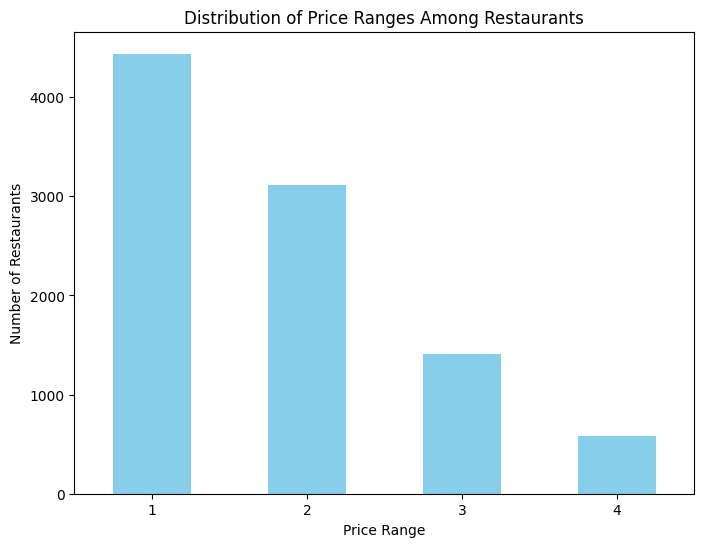

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

price_range_counts = df['Price range'].value_counts()

plt.figure(figsize=(8, 6))
price_range_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()


### Calculate the percentage of restaurants in each price range category.

In [22]:
price_range_counts = df['Price range'].value_counts()

total_restaurants = len(df)

price_range_percentages = (price_range_counts / total_restaurants) * 100

print("Percentage of restaurants in each price range category:")
print(round(price_range_percentages,2))

Percentage of restaurants in each price range category:
Price range
1    46.51
2    32.62
3    14.72
4     6.14
Name: count, dtype: float64


## Task 4 : Online Delivery

### Determine the percentage of restaurants that offer online delivery.

In [25]:
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': True, 'No': False})

online_delivery_count = df['Has Online delivery'].sum()

total_restaurants = len(df)

percentage_online_delivery = (online_delivery_count / total_restaurants) * 100

print(f"The percentage of restaurants that offer online delivery is {percentage_online_delivery:.2f}%.")

The percentage of restaurants that offer online delivery is 25.69%.


### compare the average ratings of restaurants with and without online delivery.


In [27]:
average_rating_with_delivery = df[df['Has Online delivery'] == True]['Aggregate rating'].mean()

average_rating_without_delivery = df[df['Has Online delivery'] == False]['Aggregate rating'].mean()

print(f"Average rating for restaurants with online delivery: {average_rating_with_delivery:.2f}")
print(f"Average rating for restaurants without online delivery: {average_rating_without_delivery:.2f}")

Average rating for restaurants with online delivery: 3.25
Average rating for restaurants without online delivery: 2.46


####
### GOWTHAM G.S PATIL
### SHRIDEVI INSTITUTE OF ENGINEERING AND TECHNOLOGY (SIET), TUMKURU
### COMPUTER SCIENCE ENGINEERING